In [684]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [685]:
def one_hot(columns, df):
    return pd.get_dummies(df, columns=columns)


def clean_dataframe(df):
    df = df.copy()
    cols_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    df.drop(cols_to_remove, axis=1, inplace=True)
    
    # Replace Parch and SibSp with family size column
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    
    df = one_hot(['Sex'], df)
    
    embarked = df['Embarked'].unique()
    df['Embarked'] = df['Embarked'].map(list(embarked).index)
    df.fillna(0, inplace=True)
    
    return df

In [686]:
df = pd.read_csv('titanic_train.csv')
train, val = train_test_split(clean_dataframe(df), test_size=0.23)

In [687]:
y_train = tf.convert_to_tensor(train.pop('Survived'))
x_train = tf.convert_to_tensor(train)

y_val = tf.convert_to_tensor(val.pop('Survived'))
x_val = tf.convert_to_tensor(val)

In [688]:
df_test = pd.read_csv('titanic_test.csv')
x_test = tf.convert_to_tensor(clean_dataframe(df_test))

In [689]:
norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(x_train)
norm(x_train[:3])

2021-12-26 20:25:46.756186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-26 20:25:46.767824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[-1.5631416 , -0.14372207,  4.564003  ,  0.9083662 ,  1.9176832 ,
         1.3373923 , -1.3373923 ],
       [-1.5631416 ,  2.313014  , -0.11324915, -0.5895646 , -0.5632799 ,
        -0.7477238 ,  0.7477238 ],
       [-1.5631416 , -0.08658867,  2.3710618 , -0.5895646 , -0.5632799 ,
         1.3373923 , -1.3373923 ]], dtype=float32)>

In [690]:
if os.path.exists('titanic_model'):
    model = tf.keras.models.load_model('titanic_model')
else:
    model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(x_train.shape[1], activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
      tf.keras.layers.Dense(x_train.shape[1] - 2, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
    ])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliza  (None, 7)                15        
 tion)                                                           
                                                                 
 dense_76 (Dense)            (None, 7)                 56        
                                                                 
 dense_77 (Dense)            (None, 5)                 40        
                                                                 
 dense_78 (Dense)            (None, 1)                 6         
                                                                 
Total params: 117
Trainable params: 102
Non-trainable params: 15
_________________________________________________________________


In [691]:
learning_rate = 0.01
epochs = 200

opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric = tf.keras.metrics.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=opt, loss=loss, metrics=[metric, 'accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_35 (Normaliza  (None, 7)                15        
 tion)                                                           
                                                                 
 dense_76 (Dense)            (None, 7)                 56        
                                                                 
 dense_77 (Dense)            (None, 5)                 40        
                                                                 
 dense_78 (Dense)            (None, 1)                 6         
                                                                 
Total params: 117
Trainable params: 102
Non-trainable params: 15
_________________________________________________________________


In [692]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/200
 1/18 [>.............................] - ETA: 4s - loss: 0.8516 - binary_crossentropy: 0.8516 - accuracy: 0.7500

2021-12-26 20:25:47.138625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 20ms/step - loss: 0.6351 - binary_crossentropy: 0.6351 - accuracy: 0.8120 - val_loss: 0.7646 - val_binary_crossentropy: 0.7646 - val_accuracy: 0.7899
Epoch 2/200
 1/18 [>.............................] - ETA: 0s - loss: 0.6226 - binary_crossentropy: 0.6226 - accuracy: 0.8125

2021-12-26 20:25:47.509346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 13ms/step - loss: 0.6254 - binary_crossentropy: 0.6254 - accuracy: 0.8157 - val_loss: 0.7591 - val_binary_crossentropy: 0.7591 - val_accuracy: 0.7899
Epoch 3/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6183 - binary_crossentropy: 0.6183 - accuracy: 0.8175 - val_loss: 0.7538 - val_binary_crossentropy: 0.7538 - val_accuracy: 0.7899
Epoch 4/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6126 - binary_crossentropy: 0.6126 - accuracy: 0.8175 - val_loss: 0.7471 - val_binary_crossentropy: 0.7471 - val_accuracy: 0.7899
Epoch 5/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6058 - binary_crossentropy: 0.6058 - accuracy: 0.8157 - val_loss: 0.7425 - val_binary_crossentropy: 0.7425 - val_accuracy: 0.7899
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6007 - binary_crossentropy: 0.6007 - accuracy: 0.8157 - val_loss: 0.7381 - val_binary_crossentropy: 0.7381 - val_acc

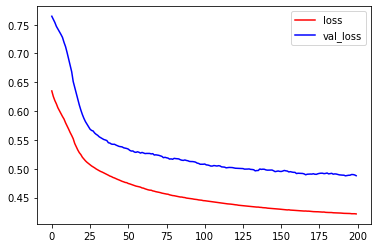

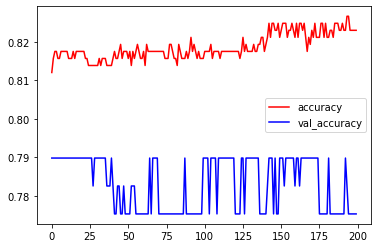

In [693]:
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['val_loss'], c='b')
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'], c='r')
plt.plot(history.history['val_accuracy'], c='b')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [694]:
model.evaluate(x_val, y_val, verbose=2)

7/7 - 0s - loss: 0.4506 - binary_crossentropy: 0.4506 - accuracy: 0.8195 - 62ms/epoch - 9ms/step


[0.4506237506866455, 0.4506237506866455, 0.8195121884346008]

In [695]:
pred = model.predict(x_test)
df_pred = pd.DataFrame(data={
  "PassengerId": df_test['PassengerId'],
  "Survived": list(map(lambda x: int(x > 0.5), pred))
})
df_pred.to_csv('./preds.csv', index=False)

2021-12-26 20:26:15.877062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
